<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_1/blob/master/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [21]:
%tensorflow_version 1.x
import math
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf # can be used in both colab and jupyter
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
print(tf.__version__)

1.15.2


In [23]:
lettersDictionary = {0 : 'A' , 1 : 'B', 2: 'C' , 3 : 'D', 4 : 'E',5 : 'F',6 : 'G',7 : 'H',8 : 'I',9 : 'J',10 : 'K' ,11 :'L',12 : 'M',13 : \
                     'N',14 : 'O',15 : 'P',16 :  'Q' , 17 : 'R', 18 : 'S',19 : 'T',20 : 'U',21 : 'V',22 : 'W',23 :'X',24 : 'Y'}

making sure tensorflow 1.X is being used

In [24]:
print(tf.__version__)
#  colab version of changin into tensorflow 1.X
print(tf.__version__)

1.15.2
1.15.2


# IMPORTING DATA

In [25]:
train_url = 'https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_1/master/DL2122_HW01/DL2122_HW01/Q1_train.csv'
test_url = 'https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_1/master/DL2122_HW01/DL2122_HW01/Q1_test.csv'

train = pd.read_csv(train_url , sep = ',' ) 
test = pd.read_csv(test_url , sep = ',' )


#DATA PREPARATION

In [29]:
# normalization 
grayScale = 255
train = train.sample(frac=1)

x_train1 = train.drop('label' , axis = 1).astype ('float32')
x_train1 = x_train1.to_numpy()
x_train1 /= grayScale
y_train1 = train['label']
y_train1 = y_train1.to_numpy()
x_test = test.drop('label' , axis = 1).astype('float32')
x_test = x_test.to_numpy()
x_test /= grayScale
y_test = test['label']
y_test = y_test.to_numpy() 
x_train_2d = x_train1.reshape(( len(x_train1), 28,28))
x_test_2d = x_test.reshape((len(x_test),28,28))
train_size = int(0.7 * len(train))
# x_train = x_train1[:train_size]
# x_validation = x_train1[train_size:]
# y_train = y_train1[:train_size]
# y_validation = y_train1[train_size:]

x_train, x_validation, y_train, y_validation =\
train_test_split(x_train1, y_train1, test_size=0.3, random_state=123 , shuffle  = True)




In [30]:
depth =25
with tf.Session() as ss :
  y_train_hot=ss.run(tf.one_hot(y_train,depth))
  y_validation_hot=ss.run(tf.one_hot(y_validation,depth))
  y_test_hot=ss.run(tf.one_hot(y_test,depth))
tf.Session().close()


x_train=tf.Session().run(tf.random.shuffle(x_train, seed=12321 ))
y_train_hot=tf.Session().run(tf.random.shuffle(y_train_hot, seed=12321))

In [33]:
def layer_FC (x_input, num_of_neurons  , activationFunction , name ,LayerNumber ) :
  inputLength = x_input.get_shape()[1]
  shape = (inputLength , num_of_neurons)
  weights = tf.get_variable(  dtype= tf.float32, shape  = shape  , name \
                            = 'weights' + str (LayerNumber )  , initializer=tf.truncated_normal_initializer(stddev=0.001))
  biases  = tf.get_variable ( dtype = tf.float32 , shape= (1 , num_of_neurons) , initializer = tf.zeros_initializer() , name =  'biases' + str (LayerNumber ))
  weightedSum = tf.add (tf.matmul(x_input , weights )  ,  biases )
  if activationFunction is 'linear' :
    return weightedSum
  if activationFunction is 'relu':
    return tf.nn.relu(weightedSum)
  elif activationFunction is 'tanh':
    return tf.nn.tanh(weightedSum)
  elif activationFunction is 'sigmoid':
    return tf.nn.sigmoid(weightedSum)
  else:
    return weightedSum # otherwise consider the activation function as linear


#NETWORK (GRAPH PHASE)

In [40]:
tf.reset_default_graph()
x = tf.placeholder(dtype = tf.float32 , shape =  [None , 784] , name = 'x_in')
o1 = layer_FC (x, 100  , 'relu' , 'L1' ,1 ) 
last_outs = layer_FC (o1, 25  , 'linear' , 'L2' ,2 ) 
y = tf.placeholder(dtype = tf.float32 , shape =  [None , 25] , name = 'y_out')


In [43]:
learning_rate=0.001
lossFucntion = tf.reduce_mean (tf.nn.softmax_cross_entropy_with_logits(labels = y  ,logits = last_outs ,  name = 'LOSS' ))

adam=tf.train.AdamOptimizer ( learning_rate=learning_rate, name='Adam').minimize(lossFucntion)
sgd=tf.train.GradientDescentOptimizer ( learning_rate=learning_rate, name='SGD').minimize(lossFucntion)


numOfEpochs = 100
batchSize = 64

iteration = len(x_train) // batchSize

# NEURAL NETWORK SESSION (ADAM)

In [44]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for epoch in range(numOfEpochs):
    averageLoss = 0
    print('====== Epoch=%s =================================== ' %(epoch))
    for i in range(math.floor(len(x_train) /batchSize)):
        f={x:x_train[i*batchSize : (i+1)*batchSize] , 
          y:y_train_hot[i*batchSize : (i+1)*batchSize] }
        (_ , loss)= sess.run ((adam , lossFucntion ),feed_dict=f)

        # print('iter {}: \t Loss={:.2f}'.format(i,sess.run(lossFucntion,feed_dict=f)))
        averageLoss += loss/ iteration 
    print('epoch {}: \t training loss ={:.2f}'.format(epoch,averageLoss))


    f_valid= {x:x_validation , y:y_validation_hot}
    # print('--------------------------------------------------')
    print('epoch {}: \t validation Loss:{:.2f} '.format(epoch,sess.run(lossFucntion,feed_dict=f_valid)))
    # print('--------------------------------------------------')

sess.close()

====== Epoch=0 =================================== 
epoch 0: 	 training loss =2.72
epoch 0: 	 validation Loss:2.19 
====== Epoch=1 =================================== 
epoch 1: 	 training loss =1.97
epoch 1: 	 validation Loss:1.79 
====== Epoch=2 =================================== 
epoch 2: 	 training loss =1.67
epoch 2: 	 validation Loss:1.56 
====== Epoch=3 =================================== 
epoch 3: 	 training loss =1.45
epoch 3: 	 validation Loss:1.38 
====== Epoch=4 =================================== 
epoch 4: 	 training loss =1.29
epoch 4: 	 validation Loss:1.23 
====== Epoch=5 =================================== 
epoch 5: 	 training loss =1.17
epoch 5: 	 validation Loss:1.11 
====== Epoch=6 =================================== 
epoch 6: 	 training loss =1.06
epoch 6: 	 validation Loss:1.02 
====== Epoch=7 =================================== 
epoch 7: 	 training loss =0.98
epoch 7: 	 validation Loss:0.95 
====== Epoch=8 =================================== 
epoch 8: 	 training 

#NETWORK SESSION SGD

In [45]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for epoch in range(numOfEpochs):
    averageLoss = 0
    print('====== Epoch=%s =================================== ' %(epoch))
    for i in range(math.floor(len(x_train) /batchSize)):
        f={x:x_train[i*batchSize : (i+1)*batchSize] , 
          y:y_train_hot[i*batchSize : (i+1)*batchSize] }
        (_ , loss)= sess.run ((sgd , lossFucntion ),feed_dict=f)

        # print('iter {}: \t Loss={:.2f}'.format(i,sess.run(lossFucntion,feed_dict=f)))
        averageLoss += loss/ iteration 
    print('epoch {}: \t training loss ={:.2f}'.format(epoch,averageLoss))


    f_valid= {x:x_validation , y:y_validation_hot}
    # print('--------------------------------------------------')
    print('epoch {}: \t validation Loss:{:.2f} '.format(epoch,sess.run(lossFucntion,feed_dict=f_valid)))
    # print('--------------------------------------------------')

sess.close()

====== Epoch=0 =================================== 
epoch 0: 	 training loss =3.22
epoch 0: 	 validation Loss:3.22 
====== Epoch=1 =================================== 
epoch 1: 	 training loss =3.22
epoch 1: 	 validation Loss:3.22 
====== Epoch=2 =================================== 
epoch 2: 	 training loss =3.22
epoch 2: 	 validation Loss:3.22 
====== Epoch=3 =================================== 
epoch 3: 	 training loss =3.22
epoch 3: 	 validation Loss:3.22 
====== Epoch=4 =================================== 
epoch 4: 	 training loss =3.22
epoch 4: 	 validation Loss:3.22 
====== Epoch=5 =================================== 
epoch 5: 	 training loss =3.22
epoch 5: 	 validation Loss:3.22 
====== Epoch=6 =================================== 
epoch 6: 	 training loss =3.22
epoch 6: 	 validation Loss:3.22 
====== Epoch=7 =================================== 
epoch 7: 	 training loss =3.21
epoch 7: 	 validation Loss:3.21 
====== Epoch=8 =================================== 
epoch 8: 	 training 

# data visualization

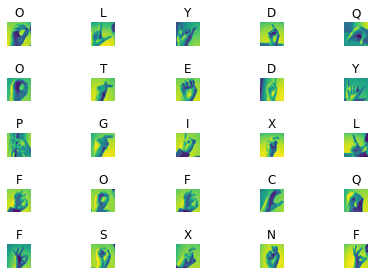

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.tight_layout()
for i in range(25):
  y_actual = y_train1 [i]
  plt.subplot(5,5,i+1).set_title(lettersDictionary[y_actual])
  plt.imshow(x_train_2d[i,:,:])
  plt.axis('off')



In [20]:
len('DGCCNQIWDDSKQWUQRNNTSVQXD')

25